**实验目标：**

通过本实验，你将深入了解和实践说话人识别技术，并掌握利用声音特征进行有效说话人识别的基本方法，了解不同特征和模型对识别准确率的影响。

实验的核心目标是使用TIMIT数据集来训练一个说话人识别系统，涵盖数据预处理、特征提取、模型训练和评估等关键步骤。


**实验方法：**

**1. 数据预处理和划分(可选)：**
  - 数据集下载地址（4月17日前有效）：https://f.ws59.cn/f/du8yd2536vl
  - 为了方便大家，我们提供了划分好的TIMIT数据集结构，当然你也可以根据需求自行划分该数据集。
  - 为简化难度，我们排除了SA的两个方言句子，并在剩余的8个句子中选取了SX的5个句子和SI的1个句子作为训练集，SI的另外2个句子作为测试集。
  - 该链接下载的数据集只保留了音频文件，完整数据集（包含音频对应文本、标注等信息）可参见备注链接下载。
  
**2. 特征提取：**
  - 学习并实现包括但不限于MFCC特征等特征的提取，探索声音信号的频率和时间特性。
  - 鼓励尝试和比较其他特征提取方法，例如LPCC或声谱图特征，以理解不同特征对识别性能的影响。
  
**3. 模型选择和训练：**
  - 探索并选择适合的分类器和模型进行说话人识别，如GMM、Softmax分类器或深度学习模型。
  - 实现模型训练流程，使用训练集数据训练模型。
  
**4. 评估和分析：**
  - 使用准确率作为主要的评价指标在测试集上评估模型性能。
  - 对比不同特征和模型的性能，分析其对说话人识别准确率的影响。
  - 可视化不同模型的识别结果和错误率，讨论可能的改进方法。

**实验要求：**
  - 1.选择并实现至少一种特征的提取，并鼓励尝试其他特征提取方法。
  - 2.选择并实现至少一种分类器或模型进行说话人识别，并使用准确率评估指标评估其性能。
  - 3.通过实验对比、分析和可视化，撰写详细的实验报告，包括实验目的、实验方法、结果分析和结论。
  - 4.实验报告应以清晰、逻辑性强的形式呈现，图表和结果应清楚明了。

**其他说明：**
  - 实验的最终打分环节会看识别性能，会对原理和实现代码部分做抽查提问，综合评定成绩。
  - 我们**鼓励做原创性探索**，即使性能不是很好，但有创新性、有价值、有意义的探索和尝试会有额外加分。
  - 原数完整据集下载地址：https://drive.google.com/file/d/180mSIiXN9RVDV2Xn1xcWNkMRm5J5MjN4/view?usp=sharing \
    或国内访问地址（4月17日前有效）：https://f.ws59.cn/f/du8xu130kba

## 1. 实验准备

In [57]:
## 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os
import librosa
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

# 可以根据需要导入其他库，比如librosa用于音频处理

## 2. 数据预处理(加载数据集)

In [58]:
## 请从如下地址下载数据集（4月17日前有效）：https://f.ws59.cn/f/du8yd2536vl
# 数据集基本信息如下
# 方言地区：DR1～DR8
# 性别：F/M
# 说话者ID：3大写字母+1阿拉伯数字
# 句子ID：句子类型（SA/SI/SX）+编号
# 详细介绍参见 https://blog.csdn.net/qq_39373179/article/details/103788208

# 上述链接下载的数据集已经
TrainDir = "..\..\Dataset\TRAIN"
TestDir = "..\..\Dataset\TEST"
# 请在这里写代码加载我们划分好的TIMIT训练集和测试集。或者原始完整版数据集。

def load_data(data_dir):
    data=[] #文件地址
    area_labels=[] #区域
    sex_labels=[] #性别
    name_labels=[] #姓名
    labels=[]
    for area_dir in os.listdir(data_dir):
        area_path=os.path.join(data_dir, area_dir) #area_path:Dataset\TRAIN\DR1
        if os.path.isdir(area_path):
            for name_path in os.listdir(area_path): 
                file_path = os.path.join(area_path, name_path) #file_path:Dataset\TRAIN\DR1\FCJF0
                for path_name in os.listdir(file_path):
                    area_labels.append(area_dir)
                    sex_labels.append(name_path[0])
                    name_labels.append(name_path[1:])
                    path = os.path.join(file_path, path_name)
                    data.append(path)
    labels = [area_label + sex_label for area_label, sex_label in zip(area_labels, sex_labels)]
    print(data)
    print(name_labels)
    return data, name_labels
    
# 加载训练集和测试集
train_data, train_labels = load_data(TrainDir)
test_data, test_labels = load_data(TestDir)

print("")
print("训练集样本数量：", len(train_data))
print("测试集样本数量：", len(test_data))

['..\\..\\Dataset\\TRAIN\\DR1\\FCJF0\\merge_result.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FCJF0\\SI648_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FCJF0\\SX127_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FCJF0\\SX217_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FCJF0\\SX307_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FCJF0\\SX37_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FCJF0\\SX397_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDAW0\\merge_result.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDAW0\\SI2036_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDAW0\\SX146_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDAW0\\SX236_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDAW0\\SX326_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDAW0\\SX416_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDAW0\\SX56_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDML0\\merge_result.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDML0\\SI2075_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDML0\\SX159_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDML0\\SX249_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\FDML0\\SX339_.wav', '..\\..\\Dataset\\TRAIN\\DR1\\F

## 3. 特征提取

In [59]:
## 提取MFCC音频特征
def extract_mfcc_features(dataset):
    mfcc_features_list=[]
    for data in dataset:
        # 读取音频文件
        audio, sr = librosa.load(data) #audio:加载的音频数据;sr:音频的采样率
        # 提取MFCC特征
        mfcc_features = librosa.feature.mfcc(y=audio, sr=sr,n_mfcc=30)
        mfcc_features = np.mean(mfcc_features,axis=1)
        mfcc_features_list.append(mfcc_features)
    return mfcc_features_list

print("训练集数据进行MFCC特征提取...")
train_mfcc = extract_mfcc_features(train_data)
print("训练集MFCC特征:", len(train_mfcc),train_mfcc[0].shape)

print("测试集数据进行MFCC特征提取...")
test_mfcc = extract_mfcc_features(test_data)
print("测试集MFCC特征:", len(test_mfcc),test_mfcc[0].shape)

训练集数据进行MFCC特征提取...
训练集MFCC特征: 3234 (30,)
测试集数据进行MFCC特征提取...
测试集MFCC特征: 924 (30,)


mfcc自行实现

In [ ]:
def mfcc(filename):
    # 读取音频信号
    f = wave.open(filename,'rb')
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    '''
    nchannels: 声道数
    sampwidth: 量化位数
    framerate: 采样频率
    nframes: 采样点数
    '''
    str_data = f.readframes(nframes)
    signal = np.fromstring(str_data, dtype=np.short)
    signal = signal * 1.0 / (max(abs(signal)))# 归一化
    signal_len = len(signal)
    # 预加重
    signal_add = np.append(signal[0], signal[1:] - 0.97 * signal[:-1])
    time = np.arange(0,nframes) / 1.0 * framerate
    # 分帧、加窗
    wlen = 512
    inc = 128
    N = 512
    if signal_len < wlen:
        nf = 1
    else:
        nf = int(np.ceil((1.0 * signal_len - wlen + inc) / inc))
    pad_len = int((nf - 1) * inc + wlen)
    zeros = np.zeros(pad_len - signal_len)
    pad_signal = np.concatenate((signal, zeros))
    indices = np.tile(np.arange(0, wlen), (nf, 1)) + np.tile(np.arange(0, nf * inc, inc),(wlen, 1)).T
    indices = np.array(indices, dtype=np.int32)
    frames = pad_signal[indices]
    win = np.hanning(wlen)

    m = 24
    s = np.zeros((nf, m))
    for i in range(nf):
        x = frames[i:i + 1]
        y = win * x[0]
        a = np.fft.fft(y)# 快速傅里叶变换
        b = np.square(abs(a))# 计算能量谱线
        #  梅尔滤波器
        mel_high = 1125 * np.log(1 + (framerate / 2) / 700)
        mel_point = np.linspace(0, mel_high, m + 2)
        Fp = 700 * (np.exp(mel_point / 1125) - 1)
        w = int(N / 2 + 1)
        df = framerate / N
        fr = []
        for n in range(w):
            frs = int(n * df)
            fr.append(frs)
        melbank = np.zeros((m, w))
        for k in range(m + 1):
            f1 = Fp[k - 1]
            f2 = Fp[k + 1]
            f0 = Fp[k]
            n1 = np.floor(f1 / df)
            n2 = np.floor(f2 / df)
            n0 = np.floor(f0 / df)
            for j in range(w):
                if j >= n1 and j <= n0:
                    melbank[k - 1, j] = (j - n1) / (n0 - n1)
                if j >= n0 and j <= n2:
                    melbank[k - 1, j] = (n2 - j) / (n2 - n0)
            for c in range(w):
                s[i, k - 1] = s[i, k - 1] + b[c:c + 1] * melbank[k - 1, c]
            # plt.plot(fr, melbank[k - 1,])
    # plt.show()
    logs = np.log(s)# 取对数
    num_ceps = 12
    D = dct(logs, type=2, axis=0, norm='ortho')[:, 1:(num_ceps + 1)]
    # print(D)
    # print(filename, np.shape(D))
    return D

In [60]:
#提取声谱图音频特征
def extract_spectrogram_features(dataset):
    spectrogram_features_list = []
    for data in dataset:
        # 读取音频文件
        audio, sr= librosa.load(data)
        # 提取声谱图特征
        spectrogram = np.abs(librosa.stft(y=audio))
        spectrogram_features_list.append(spectrogram)
    return  spectrogram_features_list

train_spectrogram = extract_mfcc_features(train_data)
print("训练集声谱图特征:", len(train_spectrogram), train_spectrogram[0].shape)

test_spectrogram = extract_mfcc_features(test_data)
print("测试集声谱图特征:", len(test_spectrogram), test_spectrogram[0].shape)

训练集声谱图特征: 3234 (30,)
测试集声谱图特征: 924 (30,)


In [61]:
def extract_lpc_lsp_features(dataset, order=12):
    lpc_features_list = []
    lsp_features_list = []
    for data in dataset:
        # 读取音频文件
        audio, sr = librosa.load(data)
        # 提取LPC系数
        lpc = librosa.lpc(audio, order=order)
        lpc_features_list.append(lpc)
        # 提取lsp特征
        lsp = np.roots(lpc)
        lsp_features_list.append(lsp)
    return lpc_features_list,lsp_features_list


train_lpc,train_lsp = extract_lpc_lsp_features(train_data, order=12)
print("训练集LPC特征:", len(train_lpc), train_lpc[0].shape)
print("训练集LSP特征:", len(train_lsp), train_lsp[0].shape)

test_lpc,test_lsp = extract_lpc_lsp_features(test_data, order=12)
print("测试集LPC特征:", len(test_lpc), test_lpc[0].shape)
print("测试集LSP特征:", len(test_lsp), test_lsp[0].shape)



训练集LPC特征: 3234 (13,)
训练集LSP特征: 3234 (12,)
测试集LPC特征: 924 (13,)
测试集LSP特征: 924 (12,)


## 4. 模型选择和训练、评价指标（准确率Accuracy）

1、GMM

In [62]:
from sklearn.mixture import GaussianMixture

def train_models(train_datas, train_labels, n_components=1, max_iter=10,reg_covar=2):
    models = {}
    unique_labels = np.unique(train_labels)
    #reg_covar是一个正则化参数，它是一个正数，它将被添加到每个组件的协方差矩阵中，以确保这些协方差矩阵在计算中保持稳定。
    for label in unique_labels:
        # 收集当前类别的所有特征
        label_features = [feature for feature, current_label in zip(train_datas, train_labels) if current_label == label]
        # 训练一个GMM模型
        gmm = GaussianMixture(n_components=n_components, max_iter=max_iter, covariance_type='full',random_state=0,reg_covar=reg_covar)
        #n_components: 这是GMM中高斯分布的数量,max_iter: 最大的迭代次数,covariance_type='diag': 这表示每个组件的协方差矩阵类型。
        gmm.fit(np.vstack(label_features))
        # 存储模型
        models[label] = gmm
        
    return models

# # 定义一个函数来统一特征形状
# def pad_features(features, pad_width=100):
#     padded_features = []

#     for feature in features:
#         # # 如果特征长度大于pad_width，我们将其裁剪，否则我们将其用0补充到pad_width
#         # if feature.shape[1] > pad_width:
#         #     padded = feature[:, :pad_width]
#         # else:
#         #     padding = np.zeros((feature.shape[0], pad_width - feature.shape[1]))
#         #     padded = np.hstack((feature, padding))

#         padded_features.append(feature.flatten())

#     return padded_features

# # 统一训练集和测试集的MFCC特征形状
# train_mfcc_padded = pad_features(train_mfcc)
# test_mfcc_padded = pad_features(test_mfcc)
# train_spectrogram_padded = pad_features(train_spectrogram)
# test_spectrogram_padded  = pad_features(test_spectrogram)

# 训练GMM模型
try:
    gmm_models_mfcc = train_models(train_mfcc, train_labels)
    print("完成模型训练!")
except Exception as e:
    print("训练失败:", e)
# try:
#     gmm_models_spectrogram= train_models(train_spectrogram_padded,train_labels)
#     print("完成模型训练!")
# except Exception as e:
#     print("训练失败:", e)


完成模型训练!


In [63]:
def predict(test_datas, models):
    predictions = []
    for data in test_datas:
        best_label, best_score = None, float('-inf')
        for label, model in models.items():
            #使用GMM模型的 score 方法来计算特征向量的得分（概率对数)
            score = model.score(np.atleast_2d(data))
            if score > best_score:
                best_label, best_score = label, score
        predictions.append(best_label)
        #在循环结束后，将最高得分对应的标签添加到 predictions 列表中
    return predictions

# 进行预测
print("正在进行预测...")
test_predictions_mfcc = predict(test_mfcc, gmm_models_mfcc)
# test_predictions_spectrogram = predict(test_spectrogram_padded, gmm_models_spectrogram)
print("预测完成!")

# 计算准确率
accuracy_mfcc = accuracy_score(test_labels, test_predictions_mfcc)
# accuracy_spectrogram = accuracy_score(test_labels, test_predictions_spectrogram)
print(f"准确率: {accuracy_mfcc:.2f}")
# print(f"准确率: {accuracy_spectrogram:.2f}")


正在进行预测...
预测完成!
准确率: 0.54


## 全连接网络

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#数据预处理
features_tensor=torch.tensor(train_mfcc,dtype=torch.float32)
features_tensor_test=torch.tensor(test_mfcc,dtype=torch.float32)
# 创建一个从标签到整数索引的映射字典
label_to_index = {label: idx for idx, label in enumerate(set(train_labels))}
print(label_to_index)  # 打印映射关系，以供检查
# 使用映射将所有标签转换为整数索引
train_labels_integers = [label_to_index[label] for label in train_labels]
test_labels_integers = [label_to_index[label] for label in test_labels]
labels_tensor=torch.tensor(train_labels_integers,dtype=torch.long)
labels_tensor_test=torch.tensor(test_labels_integers,dtype=torch.long)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
labels_tensor=labels_tensor.to(device)
features_tensor=features_tensor.to(device)

train_dataset=TensorDataset(features_tensor,labels_tensor)
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataset=TensorDataset(features_tensor_test,labels_tensor_test)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

class SpeakerRecognizer(nn.Module):
    def __init__(self,input_dim,num_speaker):
        super(SpeakerRecognizer,self).__init__()
        self.fc1=nn.Linear(input_dim,128)
        self.fc2=nn.Linear(128,num_speaker)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return x

input_dim=30
num_speakers=len(np.unique(train_labels))
model = SpeakerRecognizer(input_dim, num_speakers).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    for features, labels in train_loader:
        features, labels = features.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    # 用于存储正确预测的数量
    correct = 0
    total = 0
    
    # 遍历测试集
    for features, labels in test_loader:
        # 预测
        outputs = model(features)
        # 计算最大值的索引，即模型预测的类别
        _, predicted = torch.max(outputs, 1)
        # 将标签和预测转换为numpy数组以进行比较
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # 计算准确率
    accuracy = correct / total
    print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')



{'RLL0': 0, 'PPC0': 1, 'GES0': 2, 'AEO0': 3, 'GSL0': 4, 'MJU0': 5, 'SRG0': 6, 'MGG0': 7, 'SGF0': 8, 'CPM0': 9, 'MAH1': 10, 'MPM0': 11, 'RMG0': 12, 'MJB1': 13, 'JXM0': 14, 'DPB0': 15, 'SAS0': 16, 'MAM0': 17, 'ESG0': 18, 'PEB0': 19, 'RLJ0': 20, 'JWG0': 21, 'WDK0': 22, 'MAG0': 23, 'KKH0': 24, 'RGM0': 25, 'JEB0': 26, 'BCG1': 27, 'BJV0': 28, 'SJK0': 29, 'SLS0': 30, 'WAD0': 31, 'MWS0': 32, 'DTB0': 33, 'DMA0': 34, 'DMT0': 35, 'DWD0': 36, 'BMA0': 37, 'RHL0': 38, 'RJB1': 39, 'LJD0': 40, 'CEW0': 41, 'MSM0': 42, 'BWP0': 43, 'WAR0': 44, 'JDA0': 45, 'DLM0': 46, 'RFK0': 47, 'JRP1': 48, 'MKF0': 49, 'JKL0': 50, 'SKP0': 51, 'MJB0': 52, 'EJL0': 53, 'SES0': 54, 'DWM0': 55, 'JFR0': 56, 'GSH0': 57, 'JEE0': 58, 'RRE0': 59, 'CAJ0': 60, 'RJH0': 61, 'ZMB0': 62, 'HRM0': 63, 'DSJ0': 64, 'RVG0': 65, 'RLD0': 66, 'KAA0': 67, 'DCM0': 68, 'MEB0': 69, 'MWB0': 70, 'LAG0': 71, 'JRK0': 72, 'JLS0': 73, 'KAH0': 74, 'DAW0': 75, 'PLS0': 76, 'CMM0': 77, 'JMM0': 78, 'RDS0': 79, 'STF0': 80, 'SJS0': 81, 'HMG0': 82, 'BGT0': 83, '

KeyboardInterrupt: 

## accuracy_score自实现

In [ ]:
#from sklearn.metrics import accuracy_score
def accuracy_score(y_true, y_pred):
    correct_predictions = 0
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_true)
    return accuracy

2、softmax

In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression


# def adjust_features_length(data, max_length=100):
#     adjusted_data = []
    
#     for sample in data:
#         if sample.shape[1] < max_length:
#             padded_sample = np.pad(sample, ((0, 0), (0, max_length - sample.shape[1])), mode='constant')
#             adjusted_data.append(padded_sample)
#         else:
#             truncated_sample = sample[:, :max_length]
#             adjusted_data.append(truncated_sample)
#     adjusted_data=np.array(adjusted_data)
#      # 转置 train_features_adjusted 和 test_features_adjusted
#     features = np.transpose(adjusted_data, axes=(0, 2, 1)).reshape(len(adjusted_data), -1)

#     return features
# # 调整训练数据的特征长度
# train_mfcc_adjusted = adjust_features_length(train_mfcc)
# 调整测试数据的特征长度
# test_mfcc_adjusted = adjust_features_length(test_mfcc)
softmax_classifier_mfcc = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_classifier_mfcc.fit(train_mfcc , train_labels)
predictions_mfcc = softmax_classifier_mfcc.predict(test_mfcc)
print(predictions_mfcc)
accuracy_mfcc = accuracy_score(test_labels, predictions_mfcc)

print("准确率：", accuracy_mfcc)
    

['CJF0' 'SPM0' 'DAW0' 'DAW0' 'DML0' 'DML0' 'ECD0' 'ECD0' 'ETB0' 'ETB0'
 'JSP0' 'ECD0' 'DTD0' 'MKF0' 'MEM0' 'MEM0' 'SAH0' 'BLV0' 'SJK1' 'EWM0'
 'SMA0' 'SMA0' 'TBR0' 'RRE0' 'VFB0' 'VFB0' 'VMH0' 'TER0' 'CLM0' 'CPM0'
 'DAC0' 'MAG0' 'CLK0' 'TBC0' 'JLG1' 'EDR0' 'GRL0' 'PSW0' 'JEB1' 'JEB1'
 'JWT0' 'JWT0' 'KLS0' 'KLS0' 'STF0' 'KLW0' 'MGG0' 'MGG0' 'KAH0' 'RJH0'
 'PGH0' 'PGH0' 'RAI0' 'PGR0' 'DSS0' 'NET0' 'REM0' 'RAI0' 'KES0' 'KKH0'
 'DPS0' 'RDD0' 'RSO0' 'RSO0' 'RDD0' 'AKR0' 'TJS0' 'TJS0' 'TPF0' 'TJS0'
 'TRR0' 'LJG0' 'WAD0' 'PGR0' 'WAR0' 'WAR0' 'VLO0' 'LHD0' 'CJS0' 'DXW0'
 'SMS1' 'CAJ0' 'DFB0' 'BCG0' 'TBR0' 'CYL0' 'DAS1' 'DAS1' 'DNC0' 'JXP0'
 'DXW0' 'DXW0' 'EAC0' 'EAC0' 'SJG0' 'HLM0' 'PAD0' 'CJF0' 'KAA0' 'JLS0'
 'SKC0' 'LAC0' 'LMC0' 'LMC0' 'MJB0' 'MJB0' 'SDJ0' 'MKF0' 'MMH0' 'MMH0'
 'PJF0' 'PJF0' 'RLL0' 'RLL0' 'JSK0' 'SCN0' 'DAS1' 'SKL0' 'TML0' 'SRH0'
 'TMG0' 'TMG0' 'SRR0' 'PMB0' 'BJV0' 'BJV0' 'CLK0' 'PSW0' 'CTM0' 'DDC0'
 'JWT0' 'DBP0' 'DEM0' 'CLT0' 'DLB0' 'DLB0' 'GSL0' 'PFU0' 'DMT0' 'JWS0'
 'DPS0

d:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
# 调整训练数据的特征长度
train_spectrogram_adjusted = adjust_features_length(train_spectrogram)
# 调整测试数据的特征长度
test_spectrogram_adjusted = adjust_features_length(test_spectrogram)
softmax_classifier_spectrogram = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_classifier_spectrogram.fit(train_spectrogram_adjusted , train_labels)
predictions_spectrogram = softmax_classifier_spectrogram.predict(test_spectrogram_adjusted)
print(predictions_spectrogram)
accuracy_spectrogram = accuracy_score(test_labels, predictions_spectrogram)

print("准确率：", accuracy_spectrogram)

['DR4F' 'DR4F' 'DR1F' 'DR1F' 'DR3F' 'DR1F' 'DR4F' 'DR5F' 'DR1F' 'DR4F'
 'DR3F' 'DR8M' 'DR5F' 'DR3F' 'DR5F' 'DR5F' 'DR1F' 'DR2F' 'DR7F' 'DR3F'
 'DR4F' 'DR1F' 'DR7F' 'DR3F' 'DR6F' 'DR7F' 'DR5F' 'DR5F' 'DR4M' 'DR7M'
 'DR2M' 'DR2M' 'DR2M' 'DR2M' 'DR6M' 'DR7M' 'DR1M' 'DR1M' 'DR1M' 'DR2M'
 'DR1M' 'DR2M' 'DR1M' 'DR2M' 'DR3M' 'DR7M' 'DR2M' 'DR2M' 'DR7M' 'DR1M'
 'DR7M' 'DR3M' 'DR5M' 'DR2M' 'DR3M' 'DR3M' 'DR3M' 'DR2M' 'DR4F' 'DR2F'
 'DR4M' 'DR3M' 'DR3M' 'DR2M' 'DR2M' 'DR5M' 'DR8F' 'DR2F' 'DR2M' 'DR1F'
 'DR1M' 'DR5F' 'DR3M' 'DR2M' 'DR2M' 'DR1M' 'DR4M' 'DR4F' 'DR6F' 'DR2F'
 'DR2M' 'DR4F' 'DR2F' 'DR4M' 'DR2F' 'DR5F' 'DR8F' 'DR7F' 'DR4F' 'DR5F'
 'DR4M' 'DR7M' 'DR1F' 'DR2F' 'DR1F' 'DR3F' 'DR7F' 'DR1F' 'DR5F' 'DR3F'
 'DR8F' 'DR7F' 'DR5F' 'DR8F' 'DR5M' 'DR2F' 'DR5F' 'DR2F' 'DR5F' 'DR1F'
 'DR1F' 'DR4M' 'DR6F' 'DR7F' 'DR2F' 'DR4F' 'DR6F' 'DR3F' 'DR8F' 'DR7F'
 'DR1F' 'DR1F' 'DR7M' 'DR7M' 'DR2M' 'DR3M' 'DR5M' 'DR5M' 'DR7M' 'DR7M'
 'DR3M' 'DR2M' 'DR4M' 'DR1M' 'DR1M' 'DR5M' 'DR2M' 'DR6M' 'DR3M' 'DR4M'
 'DR8M

d:\Python\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
softmax_classifier_lpc = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_classifier_lpc .fit(train_lpc, train_labels)
# 使用训练好的模型进行测试数据的预测
predictions_lpc = softmax_classifier_lpc .predict(test_lpc )
print(predictions_lpc)
# 计算准确率并评估模型性能
accuracy_lpc = accuracy_score(test_labels, predictions_lpc)
print("准确率：", accuracy_lpc)



['DR7M' 'DR2M' 'DR7M' 'DR2M' 'DR2M' 'DR2M' 'DR2M' 'DR2M' 'DR7M' 'DR7M'
 'DR2M' 'DR7M' 'DR2M' 'DR2M' 'DR2M' 'DR2M' 'DR2M' 'DR2M' 'DR2M' 'DR2M'
 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR2M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M'
 'DR2M' 'DR7M' 'DR7M' 'DR7M' 'DR2M' 'DR7M' 'DR7M' 'DR7M' 'DR2M' 'DR7M'
 'DR7M' 'DR7M' 'DR2M' 'DR2M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M'
 'DR7M' 'DR7M' 'DR2M' 'DR2M' 'DR7M' 'DR7M' 'DR2M' 'DR7M' 'DR7M' 'DR7M'
 'DR7M' 'DR7M' 'DR2M' 'DR2M' 'DR7M' 'DR7M' 'DR2M' 'DR2M' 'DR7M' 'DR7M'
 'DR2M' 'DR2M' 'DR7M' 'DR2M' 'DR7M' 'DR7M' 'DR2M' 'DR2M' 'DR7M' 'DR2M'
 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR2M' 'DR7M' 'DR2M' 'DR7M' 'DR2M' 'DR2M'
 'DR2M' 'DR2M' 'DR7M' 'DR7M' 'DR2M' 'DR7M' 'DR2M' 'DR7M' 'DR2M' 'DR2M'
 'DR7M' 'DR7M' 'DR2M' 'DR7M' 'DR7M' 'DR2M' 'DR7M' 'DR2M' 'DR7M' 'DR2M'
 'DR2M' 'DR2M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR2M' 'DR2M' 'DR7M' 'DR2M'
 'DR7M' 'DR2M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M'
 'DR2M' 'DR2M' 'DR7M' 'DR2M' 'DR7M' 'DR7M' 'DR2M' 'DR2M' 'DR4M' 'DR7M'
 'DR7M

d:\Python\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
# 将复数特征转换为实数特征
train_lsp_adjusted = np.abs(train_lsp)
test_lsp_adjusted = np.abs(test_lsp)

softmax_classifier_lsp = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_classifier_lsp  .fit(train_lsp_adjusted , train_labels)
# 使用训练好的模型进行测试数据的预测
predictions_lsp = softmax_classifier_lsp .predict(test_lsp_adjusted )
print(predictions_lsp)
# 计算准确率并评估模型性能
accuracy_lsp  = accuracy_score(test_labels, predictions_lsp)
print("准确率：", accuracy_lsp)

d:\Python\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['DR7M' 'DR3M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M'
 'DR7M' 'DR3M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR3M' 'DR7M'
 'DR7M' 'DR7M' 'DR3M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M'
 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR3M'
 'DR7M' 'DR7M' 'DR3M' 'DR7M' 'DR7M' 'DR5F' 'DR7M' 'DR7M' 'DR4M' 'DR3M'
 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M'
 'DR7M' 'DR3M' 'DR7M' 'DR7M' 'DR7M' 'DR3M' 'DR7M' 'DR7M' 'DR7M' 'DR3M'
 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR3M' 'DR7M'
 'DR3M' 'DR3M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR3M' 'DR7M' 'DR7M' 'DR3M'
 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR3M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M'
 'DR7M' 'DR3M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M'
 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR3M' 'DR3M' 'DR7M' 'DR3M' 'DR7M' 'DR7M'
 'DR3M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR3M' 'DR7M' 'DR3M' 'DR7M' 'DR7M'
 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR7M' 'DR3M'
 'DR3M

##  6. 分析和可视化

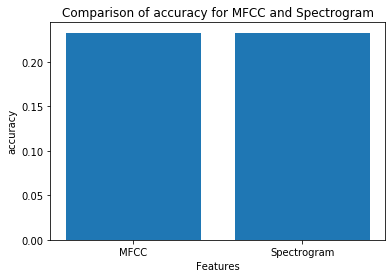

In [18]:
## 请使用matplotlib等可视化库对你的实验结果进行可视化分析。
## 包括但不限于准确率的对比、错误分类的分析、特征的影响等。
import matplotlib.pyplot as plt
# 定义特征和轮廓系数
features = ['MFCC', 'Spectrogram']
scores = [accuracy_mfcc,accuracy_spectrogram ]

# 绘制柱状图
plt.bar(features, scores)
plt.xlabel('Features')
plt.ylabel('accuracy')
plt.title('Comparison of accuracy for MFCC and Spectrogram')
plt.show()

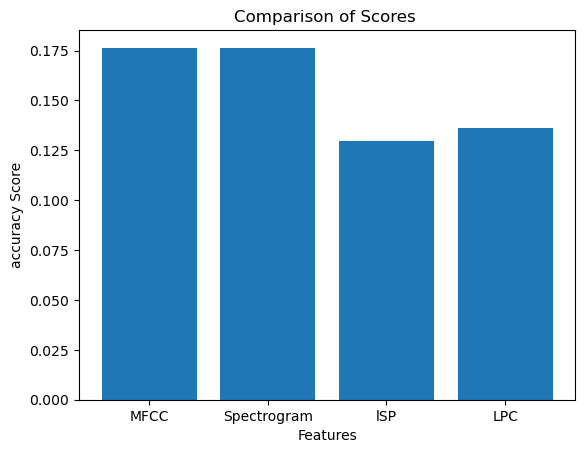

In [98]:
## 请使用matplotlib等可视化库对你的实验结果进行可视化分析。
## 包括但不限于准确率的对比、错误分类的分析、特征的影响等。
import matplotlib.pyplot as plt
# 定义特征和轮廓系数
features = ['MFCC', 'Spectrogram','lSP','LPC']
scores = [accuracy_mfcc, accuracy_spectrogram,accuracy_lsp,accuracy_lpc]

# 绘制柱状图
plt.bar(features, scores)
plt.xlabel('Features')
plt.ylabel('accuracy Score')
plt.title('Comparison of Scores ')
plt.show()

## 7. 结果讨论
讨论你的模型性能，尝试解释为什么某些模型比其他模型表现好，以及可能的改进方法。

## 8. 保存模型（可选）
如果需要，可以在这里添加代码保存你的模型。